# Bernoulli Naive Bayes (MNB) Model: Spam Detection

**Course:** Introduction to Machine Learning for Social Science<br>
**Course Code:** CSS5230<br>
**Teacher:** [Sahba Zojaji](https://myweb.cuhk.edu.cn/sahbazojaji/Home/Index)<br>
**University:** The Chinese University of Hong Kong, Shenzhen

---

## **Summary**
This notebook provides an introduction to **Bernoulli Naive Bayes (BNB)** for binary text classification tasks, using the SMS Spam Collection dataset to detect spam messages.

### SMS Spam Collection Dataset

The **SMS Spam Collection dataset** is a popular text dataset used for spam detection in machine learning applications. It contains labeled SMS messages, categorized as either **spam** (unwanted messages) or **ham** (regular messages). The dataset details are as follows:

- Total Samples: 5,572 SMS messages
- Two Categories: 
  - *Spam*: 747 samples (13.4%)
  - *Ham*: 4,825 samples (86.6%)
- Each message is a short text string.

## Goal:

Apply **Bernoulli Naive Bayes (BNB)** to classify SMS messages as spam or ham. Evaluate the model's performance using accuracy, precision, recall, and F1-score metrics. Additionally, analyze the most influential words for spam and ham detection and visualize their impact through bar charts.

## **Key Steps in the Notebook**
### 1. Data Preprocessing
   - Load the IMDB dataset into a structured format.
   - Convert text data into numerical format using the CountVectorizer (Bag-of-Words approach).
   - Remove stop words and prepare data for training.  

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

# Convert labels to binary (spam=1, ham=0)
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

# Preprocess text data
vectorizer = CountVectorizer(binary=True, stop_words='english')
X = vectorizer.fit_transform(data['message'])
y = data['label']

### 2. Model Training
- Split the dataset into training and testing sets.
- Train the Multinomial Naive Bayes model on the training data using class probabilities.

In [13]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Bernoulli Naive Bayes model
#################################################################################################################
#Enter your Code Here to Train the Bernoulli Naive Bayes model on the training data using class probabilities.#
#################################################################################################################

### Step 3: Model Evaluation
- Evaluate the trained model on the test set.
- Generate performance metrics such as classification accuracy, precision, recall, and F1-score.
- Visualize the confusion matrix using a heatmap.

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.97      0.84      0.90       224

    accuracy                           0.97      1672
   macro avg       0.97      0.92      0.94      1672
weighted avg       0.97      0.97      0.97      1672



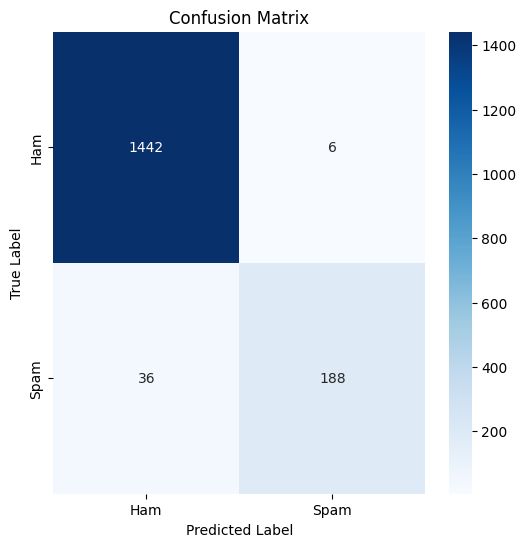

In [10]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualization: Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

### Step 4: Visualization of Results  
- Generate word clouds to highlight frequently occurring words in positive and negative reviews.
- Display bar charts for the top 10 positive and negative words with their probabilities.

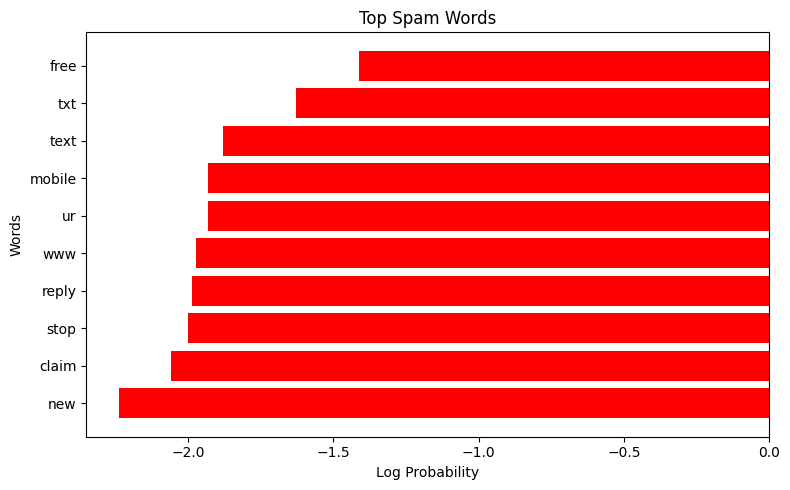

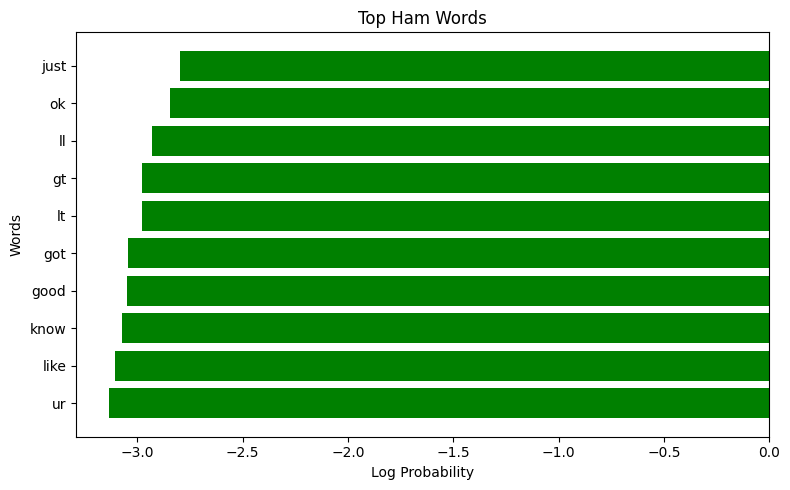

In [11]:
# Display influential words for spam and ham
feature_names = vectorizer.get_feature_names_out()
spam_prob = model.feature_log_prob_[1]
ham_prob = model.feature_log_prob_[0]

top_spam_words = sorted(zip(feature_names, spam_prob), key=lambda x: x[1], reverse=True)[:10]
top_ham_words = sorted(zip(feature_names, ham_prob), key=lambda x: x[1], reverse=True)[:10]

# Plot Top Spam Words
plt.figure(figsize=(8, 5))
plt.barh([word for word, prob in top_spam_words], [prob for word, prob in top_spam_words], color='red')
plt.title("Top Spam Words")
plt.xlabel("Log Probability")
plt.ylabel("Words")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

# Plot Top Ham Words
plt.figure(figsize=(8, 5))
plt.barh([word for word, prob in top_ham_words], [prob for word, prob in top_ham_words], color='green')
plt.title("Top Ham Words")
plt.xlabel("Log Probability")
plt.ylabel("Words")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

# <span style="color:red">Bernoulli Naive Bayes Model Assignment (5 points)</span>

## Objective
Train and evaluate a Bernoulli Naive Bayes model on text data and visualize the results.
    
## Instructions:
1. Train the Bernoulli Naive Bayes model on the training data using the given preprocessing setup.
2. Evaluate the model's performance using Step 3 code.
3. Visualize results using Step 4 code.

Provide the outputs of Step 3 and Step 4 in your report.